<a href="https://colab.research.google.com/github/srujandeshpande/breast-cancer-prediction/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics Project  
Prediction and Optimization

Team: **DataDemystifiers**  
Team Members:
<table>
<tr><th>Name</th><th>SRN</th></tr>
<tr><td>Vaibhav Gupta</td><td>PES2201800093</td></tr>
<tr><td>Srujan Vasudevrao Deshpande</td><td>PES2201800105</td></tr>
<tr><td>Aditya M Shetty</td><td>PES2201800169</td></tr>
<tr><td>Safa Hurayn</td><td>PES2201800392</td></tr>
</table>


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV
!pip install genetic 
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga


In [ ]:
# Read the dataset
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Removing the id and blank column
X = data.iloc[:, 2:-1]

# Taking all rows except header
Y = data.iloc[:, 1]

In [ ]:
# The column diagnosis contains categorical data for the type of cancer. 
# The values can be either 'M' (Malignant) or 'B' (Benign)
# We are assigning a value of 1 if M and 0 if B

Y = [1 if i=='M' else 0 for i in Y]

In [ ]:
# Taking a 80-20 split for the train and test data respectively

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Conducting Min-max normalization on the train dataset

# Find the minimum value in train dataset
min_train = X_train.min()

# Find biggest difference between min value and any point of dataset
range_train = (X_train-min_train).max()

# Normalise the data using min value and range
X_train= (X_train - min_train)/range_train

In [ ]:
# Conducting Min-max normalization on the test dataset

# Find the minimum value in test dataset
min_test = X_test.min()

# Find biggest difference between min value and any point of dataset
range_test = (X_test-min_test).max()

# Normalise the data using min value and range
X_test= (X_test - min_test)/range_test

In [ ]:
print(X_train.shape)
print(X_test.shape)
len(y_train)

(455, 30)
(114, 30)


455

In [ ]:
# Using a Support Vector Classifier
#Using polynomial kernel
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Using a Support Vector Classifier
#Using RBF kernel
classifier_1 = SVC(kernel='rbf')
classifier_1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting the values(Polynomial)
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
# Predicting the values(RBF)
y_predict_1 = classifier_1.predict(X_test)
y_predict_1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

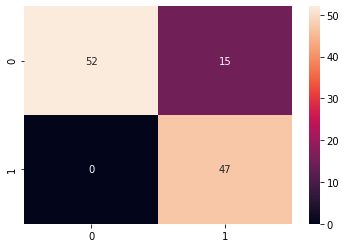

In [ ]:
# Generating a confusion matrix(Polynomial)
cm = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix
sns.heatmap(cm, annot= True)

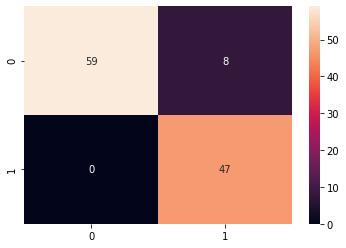

In [ ]:
# Generating a confusion matrix of the predicted values(RBF)
cm_1 = confusion_matrix(y_test, y_predict_1)

# Plotting the confusion matrix 
sns.heatmap(cm_1, annot= True)


In [ ]:
# Accuracy of the original classifier(Polynomial)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87        67
           1       0.76      1.00      0.86        47

    accuracy                           0.87       114
   macro avg       0.88      0.89      0.87       114
weighted avg       0.90      0.87      0.87       114



In [ ]:
# Accuracy of the original classifier(RBF)
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        67
           1       0.85      1.00      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



In [ ]:
# Using a Genetic Algorithm to optimize the hyperparameters for the SVM Classifier

selector = GeneticSelectionCV(SVC(),
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=1)

In [ ]:
# Training the dataset using the Genetic Algorithm optimized SVM Classifier

selector.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                      
0  	50    	[0.92140659 5.76      ]	[0.0630345  2.82531414]	[0.68131868 1.        ]	[ 0.96923077 10.        ]
1  	31    	[-999.14826374    7.3       ]	[3.00028391e+03 2.74408455e+00]	[-1.e+04  1.e+00]      	[ 0.97142857 13.        ]
2  	28    	[-799.11907692    8.18      ]	[2.71319176e+03 2.22432012e+00]	[-1.e+04  3.e+00]      	[ 0.97142857 13.        ]
3  	30    	[-999.13432967    8.94      ]	[3.00028856e+03 1.77098842e+00]	[-1.e+04  3.e+00]      	[ 0.97142857 13.        ]
4  	29    	[-1599.19002198     9.46      ]	[3.66641406e+03 1.53896069e+00]	[-1.e+04  6.e+00]      	[ 0.97362637 13.        ]
5  	30    	[-1799.20962637     9.78      ]	[3.84224485e+03 1.57848028e+00]	[-1.e+04  4.e+00]      	[ 0.97362637 14.        ]
6  	31    	[-1599.18835165     9.32      ]	[3.66641479e+03 1.31818056e+00]	[-1.e+04  6.e+00]      	[ 0.97362637 11.     

GeneticSelectionCV(caching=True, crossover_independent_proba=0.5,
                   crossover_proba=0.5, cv=5,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   fit_params=None, max_features=10,
                   mutation_independent_proba=0.05, mutation_proba=0.2,
                   n_gen_no_change=10, n_generations=40, n_jobs=1,
                   n_population=50, scoring='accuracy', tournament_size=3,
                   verbose=1)

In [ ]:
# Predicting the values using the trained classifier
optimized_preds = selector.predict(X_test)

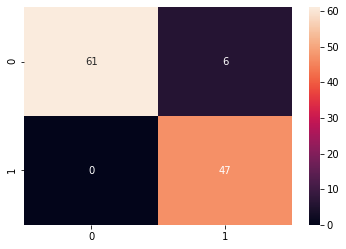

In [ ]:
# Generating a confusion matrix of the predicted values from the optimized classifier
cm = confusion_matrix(y_test, optimized_preds)

# Plotting the confusion matrix
sns.heatmap(cm, annot= True)

In [ ]:
print(classification_report(y_test, optimized_preds))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        67
           1       0.89      1.00      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114

